In [1]:
# todo： 数据清洗 将NaN新生和为负的数据进行清洗

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [11]:
college.to_csv('input/1.csv',index=True)

In [3]:
train = pd.read_table('train/subsidy_train.txt',sep=',',header=-1)
train.columns = ['id','label']
test = pd.read_table('test/studentID_test.txt',sep=',',header=-1)
test.columns = ['id']
test['label'] = np.nan

#train_test = pd.concat([train,test])
train_test=train

del train
del test

score_train = pd.read_table('train/score_train.txt',sep=',',header=-1)
score_train.columns = ['id','college','rank']
score_test = pd.read_table('test/score_test.txt',sep=',',header=-1)
score_test.columns = ['id','college','rank']
score_train_test = pd.concat([score_train,score_test])

college = pd.DataFrame(score_train_test.groupby(['college'])['rank'].max())
college.to_csv('input/college.csv',index=True)
college = pd.read_csv('input/college.csv')
college.columns = ['college','total_people']

score_train_test = pd.merge(score_train_test, college, how='left',on='college')
score_train_test['rank_percent'] = score_train_test['rank']/score_train_test['total_people']
train_test = pd.merge(train_test,score_train_test,how='left',on='id')

card_train = pd.read_table('train/card_train.txt',sep=',',header=-1)
card_train.columns = ['id','pos','place','consume','time','price','rest']
#card_test = pd.read_table('test/card_test.txt',sep=',',header=-1)
#card_test.columns = ['id','pos','place','consume','time','price','rest']
#
#card_train_test = pd.concat([card_train,card_test])
card_train_test=card_train
print "Read OK!"

##release memery
del card_train
#del card_test

IOError: [Errno 2] No such file or directory: 'input/college.csv'

In [3]:
#card_train_test=card_train_test.drop_duplicates()

In [4]:
#card_train_test.drop(['place','time'],axis=1,inplace=True)

In [5]:
card_train_test.shape

(12455558, 7)

In [8]:
card_train_test[card_train_test['price']<0].shape

(110472, 7)

In [40]:
confuse_data=card_train_test[card_train_test['price']<0]#['consume'].value_counts()

In [68]:
card_train_test[card_train_test['id']==1040]

,id,pos,place,consume,time,price,rest
18,1040,POS消费,地点661,洗衣房,2013/09/01 00:02:40,1.20,200.71
19,1040,POS消费,地点661,洗衣房,2013/09/01 00:02:40,-0.48,201.19
20,1040,POS消费,地点661,洗衣房,2013/09/01 00:02:40,-0.48,201.19
21,1040,POS消费,地点661,洗衣房,2013/09/01 00:02:40,1.20,200.71
122,1040,POS消费,地点661,洗衣房,2013/09/01 00:20:11,1.20,199.99
123,1040,POS消费,地点661,洗衣房,2013/09/01 00:20:11,1.20,199.99
152,1040,POS消费,地点661,洗衣房,2013/09/01 00:29:12,-0.66,200.65
153,1040,POS消费,地点661,洗衣房,2013/09/01 00:29:12,-0.66,200.65
154,1040,POS消费,地点661,洗衣房,2013/09/01 00:29:22,1.20,199.45
155,1040,POS消费,地点661,洗衣房,2013/09/01 00:29:22,-1.08,200.53


In [17]:
card_train_test[card_train_test['price']<0]['id'].drop_duplicates().count()

8460

In [19]:
train_test.label.value_counts()

0       9325
1000     741
1500     465
2000     354
Name: label, dtype: int64

In [33]:
drop=set(card_train_test[card_train_test['price']<0]['id'].drop_duplicates())&set(train_test[train_test['label']!=0]['id'])

In [34]:
c=0
for item in drop:
    c=c+1
    
print c

1395


In [41]:
negative=pd.DataFrame(confuse_data.groupby(['id'])['id'].count())

In [45]:
negative.to_csv('input/negative_count.csv')

In [47]:
negative=pd.read_csv('input/negative_count.csv')

In [48]:
negative.columns=['id','count']

In [52]:
train = pd.read_table('train/subsidy_train.txt',sep=',',header=-1)
train.columns = ['id','label']

In [54]:
ob=negative.merge(train,on='id',how='outer')

In [61]:
%matplotlib inline

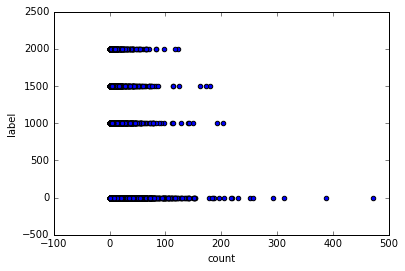

In [62]:
ob.plot.scatter(x='count',y='label')

In [66]:
ob[ob['label']!=0].id

7          22.0
8          23.0
9          28.0
13         64.0
22         92.0
23         93.0
24         99.0
28        138.0
38        160.0
39        161.0
47        186.0
58        220.0
63        232.0
66        238.0
68        244.0
69        245.0
82        296.0
83        297.0
101       398.0
102       399.0
104       408.0
105       409.0
106       412.0
107       413.0
110       430.0
111       431.0
122       476.0
123       477.0
124       480.0
132       510.0
         ...   
9051    18461.0
9052    18471.0
9059    18621.0
9060    18657.0
9061    18681.0
9074    18795.0
9078    18867.0
9080    18989.0
9082    19043.0
9088    19123.0
9093    19203.0
9097    19259.0
9099    19347.0
9107    19695.0
9110    19771.0
9113    19841.0
9122    20009.0
9126    20073.0
9129    20201.0
9134    20301.0
9141    20387.0
9142    20395.0
9147    20417.0
9154    20515.0
9158    20627.0
9162    20767.0
9197    21247.0
9198    21249.0
9201    21323.0
9211    21453.0
Name: id, dtype: float64

In [6]:
##这里的consume是有问题的，consume一列包含刷卡和消费

## bash feature
card = pd.DataFrame(card_train_test.groupby(['id'])['pos'].count())

card['price_sum'] = card_train_test.groupby(['id'])['price'].sum()
card['price_avg'] = card_train_test.groupby(['id'])['price'].mean()
#
card['price_max'] = card_train_test.groupby(['id'])['price'].max()
card['price_min'] = card_train_test.groupby(['id'])['price'].min()
card['price_median'] = card_train_test.groupby(['id'])['price'].median()

card['rest_sum'] = card_train_test.groupby(['id'])['rest'].sum()
card['rest_avg'] = card_train_test.groupby(['id'])['rest'].mean()
card['rest_max'] = card_train_test.groupby(['id'])['rest'].max()
card['rest_min'] = card_train_test.groupby(['id'])['rest'].min()
card['rest_median'] = card_train_test.groupby(['id'])['rest'].median()

card.to_csv('input/card_bashfeature.csv',index=True)
card = pd.read_csv('input/card_bashfeature.csv') 
card=card.rename(columns={'pos' : 'price_count'}) 

train_test = pd.merge(train_test, card, how='left',on='id') #2512
del card

In [7]:
'''
## recharge feature
recharge=card_train_test[(card_train_test.pos=='卡充值') | (card_train_test.pos=='圈存转账') ]

card_recharge = pd.DataFrame(recharge.groupby(['id'])['pos'].count())

card_recharge['recharge_sum']=recharge.groupby(['id'])['price'].sum()
card_recharge['recharge_avg']=recharge.groupby(['id'])['price'].mean()
#
card_recharge['recharge_max']=recharge.groupby(['id'])['price'].max()
card_recharge['recharge_min']=recharge.groupby(['id'])['price'].min()
#
card_recharge['recharge_median']=recharge.groupby(['id'])['price'].median() #2330


del recharge
card_recharge.to_csv('input/card_rechargefeature.csv',index=True)
card_recharge = pd.read_csv('input/card_rechargefeature.csv') 
card_recharge=card_recharge.rename(columns={'pos' : 'recharge_count'}) 

train_test = pd.merge(train_test, card_recharge, how='left',on='id') 
del card_recharge

## 支付领取项
zhifu = card_train_test[card_train_test.pos=='支付领取']
card_zhifu= pd.DataFrame(zhifu.groupby(['id'])['pos'].count())

card_zhifu['zhifu_sum'] = zhifu.groupby(['id'])['price'].sum()
card_zhifu['zhifu_avg'] = zhifu.groupby(['id'])['price'].mean()
#
card_zhifu['zhifu_max'] = zhifu.groupby(['id'])['price'].max()
card_zhifu['zhifu_min'] = zhifu.groupby(['id'])['price'].min()
#
card_zhifu['zhifu_median'] = zhifu.groupby(['id'])['price'].median()

del zhifu
card_zhifu.to_csv('input/card_zhifufeature.csv',index=True)
card_zhifu = pd.read_csv('input/card_zhifufeature.csv') 
card_zhifu=card_zhifu.rename(columns={'pos' : 'zhifu_count'}) 


train_test = pd.merge(train_test, card_zhifu, how='left',on='id')
del card_zhifu

'''

"\n## recharge feature\nrecharge=card_train_test[(card_train_test.pos=='\xe5\x8d\xa1\xe5\x85\x85\xe5\x80\xbc') | (card_train_test.pos=='\xe5\x9c\x88\xe5\xad\x98\xe8\xbd\xac\xe8\xb4\xa6') ]\n\ncard_recharge = pd.DataFrame(recharge.groupby(['id'])['pos'].count())\n\ncard_recharge['recharge_sum']=recharge.groupby(['id'])['price'].sum()\ncard_recharge['recharge_avg']=recharge.groupby(['id'])['price'].mean()\n#\ncard_recharge['recharge_max']=recharge.groupby(['id'])['price'].max()\ncard_recharge['recharge_min']=recharge.groupby(['id'])['price'].min()\n#\ncard_recharge['recharge_median']=recharge.groupby(['id'])['price'].median() #2330\n\n\ndel recharge\ncard_recharge.to_csv('input/card_rechargefeature.csv',index=True)\ncard_recharge = pd.read_csv('input/card_rechargefeature.csv') \ncard_recharge=card_recharge.rename(columns={'pos' : 'recharge_count'}) \n\ntrain_test = pd.merge(train_test, card_recharge, how='left',on='id') \ndel card_recharge\n\n## \xe6\x94\xaf\xe4\xbb\x98\xe9\xa2\x86\xe5\x

In [8]:
## consume feature
consume=card_train_test[card_train_test.pos == 'POS消费']

card_consume = pd.DataFrame(consume.groupby(['id'])['pos'].count())

card_consume['consume_sum']=consume.groupby(['id'])['price'].sum()
card_consume['consume_avg']=consume.groupby(['id'])['price'].mean()
card_consume['consume_max']=consume.groupby(['id'])['price'].max()
card_consume['consume_min']=consume.groupby(['id'])['price'].min()
card_consume['consume_median']=consume.groupby(['id'])['price'].median()

del consume
card_consume.to_csv('input/card_consumefeature.csv',index=True)
card_consume = pd.read_csv('input/card_consumefeature.csv') 
card_consume=card_consume.rename(columns={'pos' : 'consume_count'}) 


train_test = pd.merge(train_test, card_consume, how='left',on='id') 
del card_consume

In [9]:
kapiankaihu=card_train_test[card_train_test.pos=='卡片开户']
card_kaihu = pd.DataFrame(kapiankaihu.groupby(['id'])['pos'].count())
del kapiankaihu
card_kaihu.to_csv('input/card_kaihufeature.csv',index=True)
card_kaihu = pd.read_csv('input/card_kaihufeature.csv') 
card_kaihu=card_kaihu.rename(columns={'pos' : 'kaihu_count'}) 

train_test = pd.merge(train_test, card_kaihu, how='left',on='id') 
del card_kaihu

kapianxiaohu=card_train_test[card_train_test.pos=='卡片销户']
card_xiaohu = pd.DataFrame(kapianxiaohu.groupby(['id'])['pos'].count())
del kapianxiaohu
card_xiaohu.to_csv('input/card_xiaohufeature.csv',index=True)
card_xiaohu = pd.read_csv('input/card_xiaohufeature.csv') 
card_xiaohu=card_xiaohu.rename(columns={'pos' : 'xiaohu_count'}) 

train_test = pd.merge(train_test, card_xiaohu, how='left',on='id') 
del card_xiaohu

kapianbuban=card_train_test[card_train_test.pos=='卡补办']
card_buban = pd.DataFrame(kapianbuban.groupby(['id'])['pos'].count())
del kapianbuban
card_buban.to_csv('input/card_bubanfeature.csv',index=True)
card_buban = pd.read_csv('input/card_bubanfeature.csv') 
card_buban=card_buban.rename(columns={'pos' : 'buban_count'}) 

train_test = pd.merge(train_test, card_buban, how='left',on='id') 
del card_buban

kapianjiegua=card_train_test[card_train_test.pos=='卡解挂']
card_jiegua = pd.DataFrame(kapianjiegua.groupby(['id'])['pos'].count())
del kapianjiegua
card_jiegua.to_csv('input/card_jieguafeature.csv',index=True)
card_jiegua = pd.read_csv('input/card_jieguafeature.csv') 
card_jiegua=card_jiegua.rename(columns={'pos' : 'jiegua_count'}) 

train_test = pd.merge(train_test, card_jiegua, how='left',on='id') 
del card_jiegua

kapianchange=card_train_test[card_train_test.pos=='换卡']
card_change = pd.DataFrame(kapianchange.groupby(['id'])['pos'].count())
del kapianchange
card_change.to_csv('input/card_changefeature.csv',index=True)
card_change = pd.read_csv('input/card_changefeature.csv') 
card_change=card_change.rename(columns={'pos' : 'change_count'}) 

train_test = pd.merge(train_test, card_change, how='left',on='id') 
del card_change


In [10]:

canteen=card_train_test[card_train_test.consume=='食堂']

card_canteen = pd.DataFrame(canteen.groupby(['id'])['pos'].count())
card_canteen['canteen_sum']=canteen.groupby(['id'])['price'].sum()
card_canteen['canteen_avg']=canteen.groupby(['id'])['price'].mean()
card_canteen['canteen_max']=canteen.groupby(['id'])['price'].max()
card_canteen['canteen_min']=canteen.groupby(['id'])['price'].min()
card_canteen['canteen_median']=canteen.groupby(['id'])['price'].median()

del canteen
card_canteen.to_csv('input/card_canteenfeature.csv',index=True)
card_canteen = pd.read_csv('input/card_canteenfeature.csv') 
card_canteen=card_canteen.rename(columns={'pos' : 'canteen_count'}) 

train_test = pd.merge(train_test, card_canteen, how='left',on='id') 
del card_canteen

boiled_water=card_train_test[card_train_test.consume=='开水']

card_boiled_water = pd.DataFrame(boiled_water.groupby(['id'])['pos'].count())
card_boiled_water['boiled_water_sum']=boiled_water.groupby(['id'])['price'].sum()
card_boiled_water['boiled_water_avg']=boiled_water.groupby(['id'])['price'].mean()
card_boiled_water['boiled_water_max']=boiled_water.groupby(['id'])['price'].max()
card_boiled_water['boiled_water_min']=boiled_water.groupby(['id'])['price'].min()
card_boiled_water['boiled_water_median']=boiled_water.groupby(['id'])['price'].median()

del boiled_water
card_boiled_water.to_csv('input/card_boiled_waterfeature.csv',index=True)
card_boiled_water = pd.read_csv('input/card_boiled_waterfeature.csv') 
card_boiled_water=card_boiled_water.rename(columns={'pos' : 'boiled_water_count'}) 

train_test = pd.merge(train_test, card_boiled_water, how='left',on='id') 
del card_boiled_water

bathe=card_train_test[card_train_test.consume=='淋浴']

card_bathe = pd.DataFrame(bathe.groupby(['id'])['pos'].count())
card_bathe['bathe_sum']=bathe.groupby(['id'])['price'].sum()
card_bathe['bathe_avg']=bathe.groupby(['id'])['price'].mean()
card_bathe['bathe_max']=bathe.groupby(['id'])['price'].max()
card_bathe['bathe_min']=bathe.groupby(['id'])['price'].min()
card_bathe['bathe_median']=bathe.groupby(['id'])['price'].median()

del bathe
card_bathe.to_csv('input/card_bathefeature.csv',index=True)
card_bathe = pd.read_csv('input/card_bathefeature.csv') 
card_bathe=card_bathe.rename(columns={'pos' : 'bathe_count'}) 

train_test = pd.merge(train_test, card_bathe, how='left',on='id') 
del card_bathe

shool_bus=card_train_test[card_train_test.consume=='校车']

card_shool_bus = pd.DataFrame(shool_bus.groupby(['id'])['pos'].count())
card_shool_bus['shool_bus_sum']=shool_bus.groupby(['id'])['price'].sum()
card_shool_bus['shool_bus_avg']=shool_bus.groupby(['id'])['price'].mean()
card_shool_bus['shool_bus_max']=shool_bus.groupby(['id'])['price'].max()
card_shool_bus['shool_bus_min']=shool_bus.groupby(['id'])['price'].min()
card_shool_bus['shool_bus_median']=shool_bus.groupby(['id'])['price'].median()

del shool_bus
card_shool_bus.to_csv('input/card_shool_busfeature.csv',index=True)
card_shool_bus = pd.read_csv('input/card_shool_busfeature.csv') 
card_shool_bus=card_shool_bus.rename(columns={'pos' : 'shool_bus_count'}) 

train_test = pd.merge(train_test, card_shool_bus, how='left',on='id') 
del card_shool_bus

shop=card_train_test[card_train_test.consume=='超市']

card_shop = pd.DataFrame(shop.groupby(['id'])['pos'].count())
card_shop['shop_sum']=shop.groupby(['id'])['price'].sum()
card_shop['shop_avg']=shop.groupby(['id'])['price'].mean()
card_shop['shop_max']=shop.groupby(['id'])['price'].max()
card_shop['shop_min']=shop.groupby(['id'])['price'].min()
card_shop['shop_median']=shop.groupby(['id'])['price'].median()

del shop
card_shop.to_csv('input/card_shopfeature.csv',index=True)
card_shop = pd.read_csv('input/card_shopfeature.csv') 
card_shop=card_shop.rename(columns={'pos' : 'shop_count'}) 

train_test = pd.merge(train_test, card_shop, how='left',on='id') 
del card_shop

wash_house=card_train_test[card_train_test.consume=='洗衣房']

card_wash_house = pd.DataFrame(wash_house.groupby(['id'])['pos'].count())
card_wash_house['wash_sum']=wash_house.groupby(['id'])['price'].sum()
card_wash_house['wash_avg']=wash_house.groupby(['id'])['price'].mean()
card_wash_house['wash_max']=wash_house.groupby(['id'])['price'].max()
card_wash_house['wash_min']=wash_house.groupby(['id'])['price'].min()
card_wash_house['wash_median']=wash_house.groupby(['id'])['price'].median()

del wash_house
card_wash_house.to_csv('input/card_wash_housefeature.csv',index=True)
card_wash_house = pd.read_csv('input/card_wash_housefeature.csv') 
card_wash_house=card_wash_house.rename(columns={'pos' : 'wash_house_count'}) 

train_test = pd.merge(train_test, card_wash_house, how='left',on='id') 
del card_wash_house

library=card_train_test[card_train_test.consume=='图书馆']

card_library= pd.DataFrame(library.groupby(['id'])['pos'].count())
card_library['library_sum']=library.groupby(['id'])['price'].sum()
card_library['library_avg']=library.groupby(['id'])['price'].mean()
card_library['library_max']=library.groupby(['id'])['price'].max()
card_library['library_min']=library.groupby(['id'])['price'].min()
card_library['library_median']=library.groupby(['id'])['price'].median()

del library
card_library.to_csv('input/card_libraryfeature.csv',index=True)
card_library = pd.read_csv('input/card_libraryfeature.csv') 
card_library=card_library.rename(columns={'pos' : 'library_count'}) 

train_test = pd.merge(train_test, card_library, how='left',on='id') 
del card_library

printhouse=card_train_test[card_train_test.consume=='文印中心']

card_printhouse= pd.DataFrame(printhouse.groupby(['id'])['pos'].count())
card_printhouse['print_sum']=printhouse.groupby(['id'])['price'].sum()
card_printhouse['print_avg']=printhouse.groupby(['id'])['price'].mean()
card_printhouse['print_max']=printhouse.groupby(['id'])['price'].max()
card_printhouse['print_min']=printhouse.groupby(['id'])['price'].min()
card_printhouse['print_median']=printhouse.groupby(['id'])['price'].median()

del printhouse
card_printhouse.to_csv('input/card_printhousefeature.csv',index=True)
card_printhouse = pd.read_csv('input/card_printhousefeature.csv') 
card_printhouse=card_printhouse.rename(columns={'pos' : 'printhouse_count'}) 

train_test = pd.merge(train_test, card_printhouse, how='left',on='id') 
del card_printhouse

dean=card_train_test[card_train_test.consume=='教务处']

card_dean= pd.DataFrame(dean.groupby(['id'])['pos'].count())
card_dean['dean_sum']=dean.groupby(['id'])['price'].sum()
card_dean['dean_avg']=dean.groupby(['id'])['price'].mean()
card_dean['dean_max']=dean.groupby(['id'])['price'].max()
card_dean['dean_min']=dean.groupby(['id'])['price'].min()
card_dean['dean_median']=dean.groupby(['id'])['price'].median()

del dean
card_dean.to_csv('input/card_deanfeature.csv',index=True)
card_dean = pd.read_csv('input/card_deanfeature.csv') 
card_dean=card_dean.rename(columns={'pos' : 'dean_count'}) 

train_test = pd.merge(train_test, card_dean, how='left',on='id') 
del card_dean

other=card_train_test[card_train_test.consume=='其他']

card_other= pd.DataFrame(other.groupby(['id'])['pos'].count())
card_other['other_sum']=other.groupby(['id'])['price'].sum()
#
card_other['other_avg']=other.groupby(['id'])['price'].mean()
#
card_other['other_max']=other.groupby(['id'])['price'].max()
#
card_other['other_min']=other.groupby(['id'])['price'].min()
#
card_other['other_median']=other.groupby(['id'])['price'].median()

del other
card_other.to_csv('input/card_otherfeature.csv',index=True)
card_other = pd.read_csv('input/card_otherfeature.csv') 
card_other=card_other.rename(columns={'pos' : 'other_count'}) 

train_test = pd.merge(train_test, card_other, how='left',on='id') 
del card_other

hospital=card_train_test[card_train_test.consume=='校医院']

card_hospital= pd.DataFrame(hospital.groupby(['id'])['pos'].count())
card_hospital['hospital_sum']=hospital.groupby(['id'])['price'].sum()
card_hospital['hospital_avg']=hospital.groupby(['id'])['price'].mean()
#
card_hospital['hospital_max']=hospital.groupby(['id'])['price'].max()
card_hospital['hospital_min']=hospital.groupby(['id'])['price'].min()
#
card_hospital['hospital_median']=hospital.groupby(['id'])['price'].median()

del hospital
card_hospital.to_csv('input/card_hospitalfeature.csv',index=True)
card_hospital = pd.read_csv('input/card_hospitalfeature.csv') 
card_hospital=card_hospital.rename(columns={'pos' : 'hospital_count'}) 

train_test = pd.merge(train_test, card_hospital, how='left',on='id') 
del card_hospital

del card_train_test
train_test=train_test.fillna(-1)

In [11]:
train_test.head()

,id,label,college,rank,total_people,rank_percent,price_count,price_sum,price_avg,price_max,...,other_avg,other_max,other_min,other_median,hospital_count,hospital_sum,hospital_avg,hospital_max,hospital_min,hospital_median
0,0,0,9.0,1.0,2933.0,0.000341,602.0,4784.14,7.830016,200.0,...,-1.00,-1.00,-1.00,-1.00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,1,0,9.0,2.0,2933.0,0.000682,666.0,5876.97,8.784709,300.0,...,-1.00,-1.00,-1.00,-1.00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,8,0,6.0,1565.0,1570.0,0.996815,1285.0,10779.15,8.388444,200.0,...,-1.00,-1.00,-1.00,-1.00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,9,0,6.0,1570.0,1570.0,1.000000,1569.0,14174.15,9.033875,200.0,...,61.13,61.13,61.13,61.13,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,10,0,3.0,1.0,2304.0,0.000434,827.0,5976.01,7.191348,200.0,...,-1.00,-1.00,-1.00,-1.00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [12]:
X = train_test.ix[:, train_test.columns != 'label']
y = train_test.ix[:, train_test.columns == 'label']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [14]:
train=X_train
train['label']=y_train

test=X_test

/home/kuhung/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [15]:
target = 'label'
IDcol = 'id'
ids = test['id'].values
predictors = [x for x in train.columns if x not in [target]]


In [16]:
# Oversample
Oversampling1000 = train.loc[train.label == 1000]
Oversampling1500 = train.loc[train.label == 1500]
Oversampling2000 = train.loc[train.label == 2000]
for i in range(5):
    train = train.append(Oversampling1000)
for j in range(8):
    train = train.append(Oversampling1500)
for k in range(10):
    train = train.append(Oversampling2000)
    

In [17]:
train.head()

,id,college,rank,total_people,rank_percent,price_count,price_sum,price_avg,price_max,price_min,...,other_max,other_min,other_median,hospital_count,hospital_sum,hospital_avg,hospital_max,hospital_min,hospital_median,label
613,1874,9.0,1423.0,2933.0,0.485169,1245.0,8227.78,6.603355,100.0,-15.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1500
4030,12364,8.0,1280.0,2830.0,0.452297,2106.0,13355.65,6.329692,1100.0,-13.20,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
3582,10940,13.0,725.0,2714.0,0.267133,1729.0,10806.25,6.250000,200.0,-10.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
6237,18765,19.0,794.0,2305.0,0.344469,1308.0,10497.23,8.007040,300.0,-0.96,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
1430,4457,6.0,1474.0,1570.0,0.938854,1957.0,12735.75,6.507793,200.0,-3.54,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0


In [18]:
## Evaluation 
def f1_macro(label_truth, predictions):
    df=pd.DataFrame(columns=["subsidy_x","subsidy_y"])
    df.subsidy_y=predictions
    df.subsidy_x=np.array(label_truth)
    df.subsidy_y = df.subsidy_y.apply(lambda x:int(x))

    
    correct = df[df['subsidy_x'] == df['subsidy_y']]
    s = 0
    for i in [1000, 1500, 2000]:
        r = float(sum(correct['subsidy_y'] == i))/sum(df['subsidy_x'] == i)
        p = float(sum(correct['subsidy_y'] == i))/sum(df['subsidy_y'] == i)
        f = r*p*2/(r+p)
        if not np.isnan(f):
            s += (float(sum(df['subsidy_x'] == i))/df.shape[0])*f
    return s  

In [19]:
from sklearn import ensemble

In [20]:
'''
## ensemble
clf1 = XGBClassifier(max_depth=5,objective='multi:softmax',n_estimators=100,seed=0)
clf2 = GradientBoostingClassifier(n_estimators=200,random_state=2016)
clf3 = GradientBoostingClassifier(n_estimators=200,random_state=42)

clfs=ensemble.VotingClassifier(estimators=[('xgb',clf1),('GBM',clf2),('RF',clf3)],voting='hard')

clfs = clfs.fit(train[predictors],train[target])
result = clfs.predict(test[predictors])

f1_macro(y_test,result)
'''

"\n## ensemble\nclf1 = XGBClassifier(max_depth=5,objective='multi:softmax',n_estimators=100,seed=0)\nclf2 = GradientBoostingClassifier(n_estimators=200,random_state=2016)\nclf3 = GradientBoostingClassifier(n_estimators=200,random_state=42)\n\nclfs=ensemble.VotingClassifier(estimators=[('xgb',clf1),('GBM',clf2),('RF',clf3)],voting='hard')\n\nclfs = clfs.fit(train[predictors],train[target])\nresult = clfs.predict(test[predictors])\n\nf1_macro(y_test,result)\n"

In [21]:
# model
clf=XGBClassifier(max_depth=4,objective='multi:softmax',n_estimators=100,seed=0)
#clf = GradientBoostingClassifier(n_estimators=200,random_state=2016)
#clf = RandomForestClassifier(n_estimators=150,random_state=42,max_depth=10)
clf = clf.fit(train[predictors],train[target])
result = clf.predict(test[predictors])
f1_macro(y_test,result)

0.02792262079090802

In [22]:
'''
## Evaluation
def score(df):
    # df有三列，ID:学生ID,subsidy_x:实际奖学金金额,subsidy_y:预测奖学金金额
    correct = test_result[test_result['subsidy_x'] == test_result['subsidy_y']]
    s = 0
    for i in [1000, 1500, 2000]:
        r = float(sum(correct['subsidy_y'] == i))/sum(test_result['subsidy_x'] == i)
        p = float(sum(correct['subsidy_y'] == i))/sum(test_result['subsidy_y'] == i)
        f = r*p*2/(r+p)
        if not np.isnan(f):
            s += (float(sum(test_result['subsidy_x'] == i))/test_result.shape[0])*f
    print(s)

test_result = pd.DataFrame(columns=["studentid","subsidy_x","subsidy_y"])
test_result.studentid = ids

test_result.subsidy_x =np.array(y_test)
test_result.subsidy_y = result
test_result.subsidy_y = test_result.subsidy_y.apply(lambda x:int(x))

score(test_result)

'''

'\n## Evaluation\ndef score(df):\n    # df\xe6\x9c\x89\xe4\xb8\x89\xe5\x88\x97\xef\xbc\x8cID:\xe5\xad\xa6\xe7\x94\x9fID,subsidy_x:\xe5\xae\x9e\xe9\x99\x85\xe5\xa5\x96\xe5\xad\xa6\xe9\x87\x91\xe9\x87\x91\xe9\xa2\x9d,subsidy_y:\xe9\xa2\x84\xe6\xb5\x8b\xe5\xa5\x96\xe5\xad\xa6\xe9\x87\x91\xe9\x87\x91\xe9\xa2\x9d\n    correct = test_result[test_result[\'subsidy_x\'] == test_result[\'subsidy_y\']]\n    s = 0\n    for i in [1000, 1500, 2000]:\n        r = float(sum(correct[\'subsidy_y\'] == i))/sum(test_result[\'subsidy_x\'] == i)\n        p = float(sum(correct[\'subsidy_y\'] == i))/sum(test_result[\'subsidy_y\'] == i)\n        f = r*p*2/(r+p)\n        if not np.isnan(f):\n            s += (float(sum(test_result[\'subsidy_x\'] == i))/test_result.shape[0])*f\n    print(s)\n\ntest_result = pd.DataFrame(columns=["studentid","subsidy_x","subsidy_y"])\ntest_result.studentid = ids\n\ntest_result.subsidy_x =np.array(y_test)\ntest_result.subsidy_y = result\ntest_result.subsidy_y = test_result.subsidy

In [23]:
'''
## Feature importance
%matplotlib 
clf=XGBClassifier(max_depth=5,objective='multi:softmax',n_estimators=100,seed=0)
feat_imp=pd.Series(clf.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')

'''

"\n## Feature importance\n%matplotlib \nclf=XGBClassifier(max_depth=5,objective='multi:softmax',n_estimators=100,seed=0)\nfeat_imp=pd.Series(clf.booster().get_fscore()).sort_values(ascending=False)\nfeat_imp.plot(kind='bar', title='Feature Importances')\n\n"